In [1]:
import itertools
import numpy as np

from utils import load_bank_data, elbow_method, BIC_scores, show_class_splits, plot_roc_curve, plot_learning_curve

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.manifold import TSNE

from scipy import linalg
from scipy.spatial.distance import cdist
from scipy.stats import kurtosis

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Bank Data

In [4]:
x, y = load_bank_data()

## Clustering

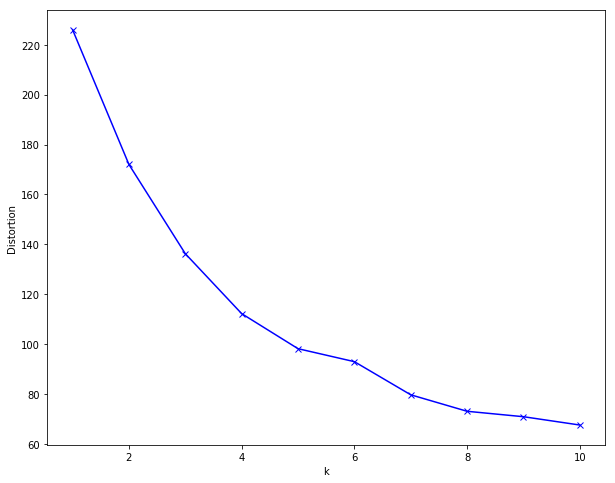

In [6]:
n = 10
elbow_method(x, range(1, n+1))

In [24]:
k = 6
clusters = KMeans(k).fit_predict(x)
show_class_splits(clusters, y)

[10553] [1116]
[544] [958]
[3151] [1199]
[21594] [438]
[628] [798]
[78] [131]


In [78]:
x[clusters==3].mean()

age                                39.963825
duration                          108.050336
campaign                            2.819898
pdays                             999.000000
previous                            0.111156
emp.var.rate                        0.266181
cons.price.idx                     93.593701
cons.conf.idx                     -40.526698
euribor3m                           3.843281
nr.employed                      5178.216136
job_blue-collar                     0.222177
job_entrepreneur                    0.035448
job_housemaid                       0.026507
job_management                      0.070171
job_retired                         0.037400
job_self-employed                   0.036356
job_services                        0.095497
job_student                         0.016022
job_technician                      0.171069
job_unemployed                      0.024782
job_unknown                         0.007852
marital_married                     0.611701
marital_si

In [85]:
(np.mean(x[clusters!=3].values, axis=0) - np.mean(x[clusters==3].values, axis=0)) / np.mean(x[clusters==3].values, axis=0) * 100

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 3.24076976e-01,  2.98957831e+02, -1.92379905e+01, -7.86113426e+00,
        1.19554289e+02, -1.48868756e+02, -4.14359689e-02, -1.27847519e-01,
       -1.24192922e+01, -4.64233240e-01,  2.41964529e+00, -5.96463994e-01,
       -6.25606055e+00,  2.51533200e+00,  2.50633024e+01, -1.09757614e+01,
        1.94881807e+00,  7.00767280e+01, -9.24638752e+00, -1.41693762e+00,
        4.37647934e+00, -2.27643973e+00,  5.99589730e+00,  4.05721445e+01,
        1.79169099e-01,  1.91530317e+00,  2.63840514e+00, -2.68095446e+01,
       -6.21296265e+00, -3.45119129e+00,  1.27764667e+01, -1.02565454e+01,
       -1.00000000e+02, -1.24095923e+01, -3.29530371e-01, -1.24095923e+01,
       -3.16074179e+00, -1.02485800e+01, -2.71854330e+01,  2.30358135e+02,
       -4.74156180e+00, -1.57166748e+01,  4.44798600e+01,  1.09921192e+01,
       -1.52377736e+01,  7.99140888e+01,  1.41278473e+02, -6.49024258e+00,
        3.34002432e+00,  4.74547393e+00,  5.00533619e+00, -8.60321304e+00,
                   inf])

## Expectation Maximization

<Figure size 720x576 with 0 Axes>

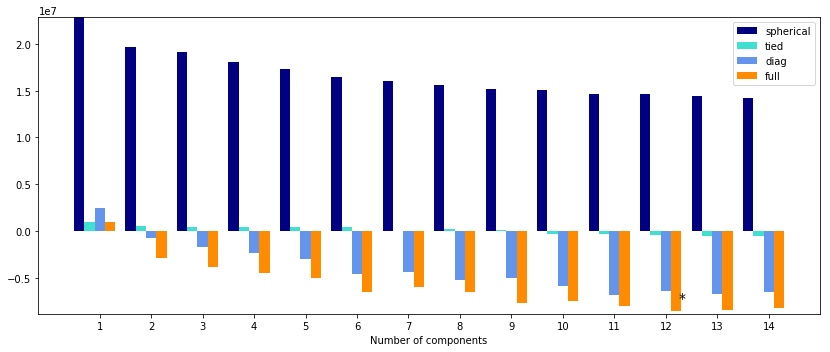

In [80]:
n = 15
plt.figure(figsize=(10, 8))
bic = BIC_scores(x, range(1, n))

Text(0, 0.5, 'BIC')

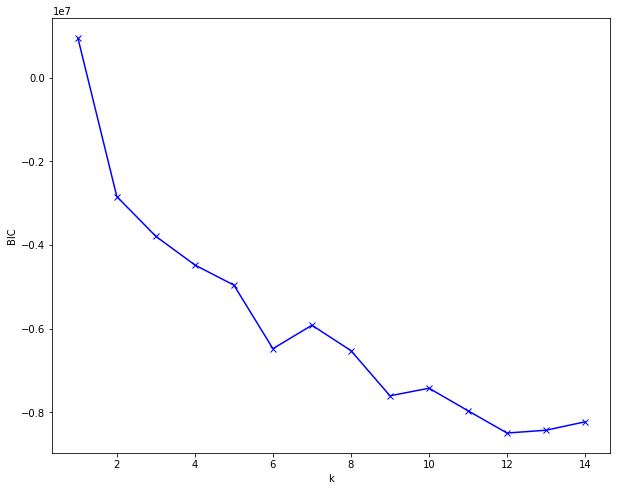

In [81]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, n), bic.reshape(-1, n-1)[-1, :], 'bx-')
plt.xlabel('k')
plt.ylabel('BIC')

In [82]:
k = 6
gmm = GaussianMixture(k, 'full')
gmm.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [83]:
em_clusters = gmm.fit_predict(x)

In [84]:
show_class_splits(em_clusters, y)

[7039] [963]
[1462] [802]
[545] [963]
[2711] [643]
[24660] [1190]
[131] [79]


In [94]:
(np.mean(x[em_clusters!=4].values, axis=0) - np.mean(x[em_clusters==4].values, axis=0)) / np.mean(x[em_clusters==4].values, axis=0) * 100

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 1.39265065e+00,  7.35502074e+00, -2.20167072e+01, -9.81796113e+00,
        1.58718005e+03, -2.48953130e+02, -7.67267039e-01,  7.26147847e+00,
       -6.67415354e+01, -2.39244022e+00, -2.62067280e+01, -3.59404731e+01,
       -5.04064777e+01, -2.21365237e+01,             inf, -2.34085625e+01,
       -2.17934843e+01,             inf, -3.40255566e+01,  1.70626627e+05,
       -3.38657525e+01, -1.29847501e+01,  3.48600030e+01,             inf,
       -1.72124752e+01, -7.43928090e+00,  8.04537075e+00,             inf,
       -8.18431320e+00,  3.01385337e+00,  5.39413296e+00, -4.75992350e+01,
       -1.00000000e+02,  5.77734406e-01,  1.06019332e+01,  5.77734406e-01,
        1.58091162e-01, -6.97547524e+01, -5.64327243e+01,             inf,
       -7.48357517e+01, -4.91835690e+01,             inf,  4.94809937e+01,
       -6.01023837e+01,             inf,             inf,  1.10109248e+01,
        3.92084661e+00, -8.23525944e+00, -1.26332768e+01, -3.07213638e+01,
                   inf])

In [106]:
x[em_clusters!=4]['job_unemployed'].sum()

1013

## PCA

In [107]:
pca = PCA()

In [108]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [111]:
pca.explained_variance_ratio_

array([6.26922320e-01, 3.30904467e-01, 4.08537841e-02, 1.01342190e-03,
       1.91030837e-04, 6.95091080e-05, 8.05755752e-06, 3.67051082e-06,
       2.83757773e-06, 2.45573254e-06, 2.32783261e-06, 2.23258822e-06,
       1.99156081e-06, 1.94693218e-06, 1.91796485e-06, 1.82961747e-06,
       1.81217298e-06, 1.78509210e-06, 1.37942249e-06, 1.21036817e-06,
       1.19031781e-06, 1.00176860e-06, 9.27956439e-07, 7.39409779e-07,
       6.12778452e-07, 5.35374435e-07, 5.01357331e-07, 4.33804765e-07,
       4.20600795e-07, 4.19037856e-07, 4.08890800e-07, 3.55045692e-07,
       3.22835678e-07, 3.06620191e-07, 2.66954437e-07, 2.32238545e-07,
       1.85629172e-07, 1.80479245e-07, 1.60574175e-07, 1.45012786e-07,
       1.37854207e-07, 1.18892098e-07, 9.65996686e-08, 8.43839362e-08,
       6.55914223e-08, 6.10576827e-08, 3.76384866e-08, 2.65709312e-08,
       1.76246969e-08, 1.43805722e-08, 4.04179918e-09, 6.76464746e-10,
       5.25400579e-33])

In [118]:
sum(pca.explained_variance_ratio_[:3])

0.9986805712277073

In [119]:
x.shape

(41188, 53)

Text(0, 0.5, 'Explained Variance Ratio')

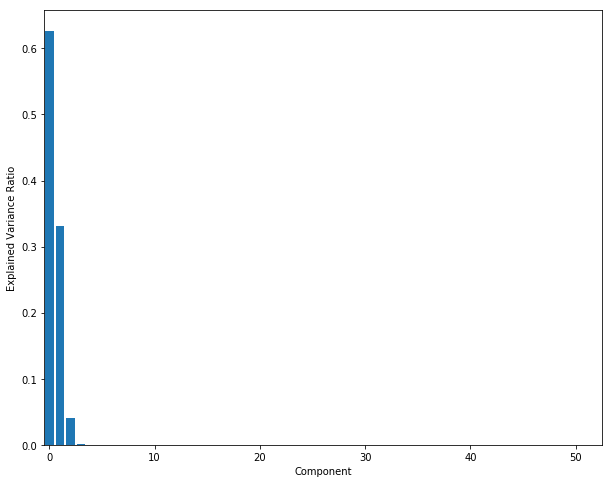

In [112]:
plt.figure(figsize=(10, 8))
plt.bar(range(x.shape[1]), pca.explained_variance_ratio_)
plt.xlim(-0.5, x.shape[1]-0.5)
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')

In [120]:
pca_red = PCA(n_components=3)

In [121]:
pca_red.fit(x)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [124]:
x_red_pca = pca_red.transform(x)

In [125]:
x_recon_pca = pca_red.inverse_transform(x_red_pca)

In [126]:
np.sum(np.sqrt(np.mean(np.square(x.values - x_recon_pca), axis=0)))

31.494504792814798

In [127]:
np.mean(np.abs(x.values - x_recon_pca) / x.values, axis=0) * 100

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 2.22778776e+01,             inf,  8.44504022e+01,             inf,
                   inf, -6.90864753e+01,  4.24226268e-01, -1.01414015e+01,
        2.53993456e+01,  1.05101784e-03,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf])

## k-Means on PCA

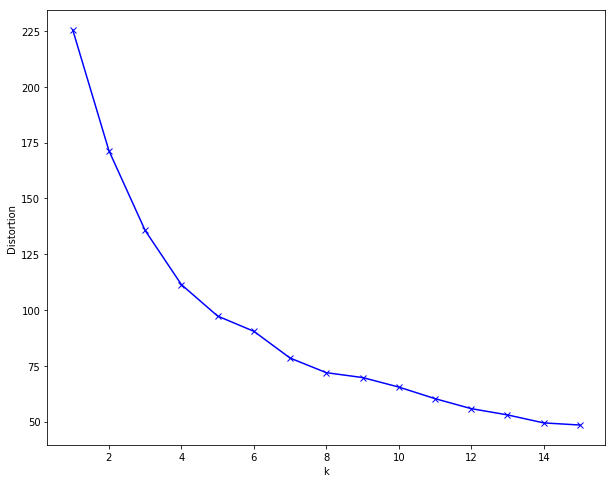

In [415]:
n = 16
elbow_method(x_red_pca, range(1, n))

In [428]:
k = 8
km_pca_clusters = KMeans(k).fit_predict(x_red_pca)
show_class_splits(km_pca_clusters, y)

[15232] [36]
[544] [958]
[1215] [950]
[9063] [496]
[330] [475]
[3759] [934]
[6364] [730]
[41] [61]


## EM on PCA

<Figure size 720x576 with 0 Axes>

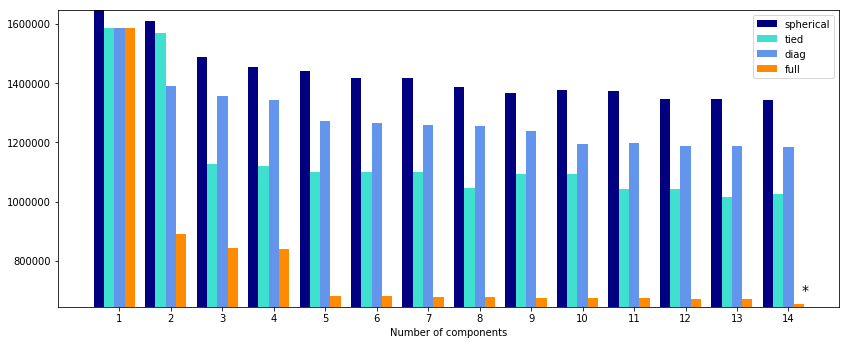

In [429]:
n = 15
plt.figure(figsize=(10, 8))
bic = BIC_scores(x_red_pca, range(1, n))

Text(0, 0.5, 'BIC')

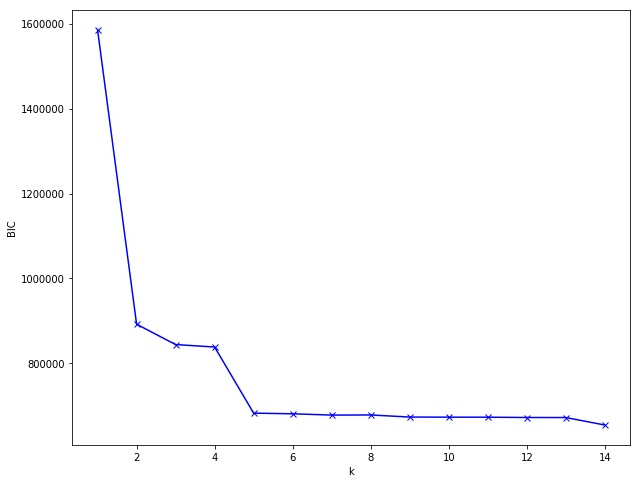

In [430]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, n), bic.reshape(-1, n-1)[-1, :], 'bx-')
plt.xlabel('k')
plt.ylabel('BIC')

In [432]:
k = 5
gmm = GaussianMixture(k, 'full')
gmm.fit(x_red_pca)
em_pca_clusters = gmm.fit_predict(x_red_pca)
show_class_splits(em_pca_clusters, y)

[24137] [180]
[812] [791]
[548] [967]
[7247] [954]
[3804] [1748]


## NN on PCA

In [439]:
x_train, x_test, y_train, y_test = train_test_split(x_red_pca, y, test_size=0.15, shuffle=True, random_state=24)

In [440]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [463]:
ann = MLPClassifier((64, 64), activation='logistic', solver='adam')

In [464]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[learning_curve] Training set sizes: [ 1018  3309  5600  7891 10183]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.2min finished


<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

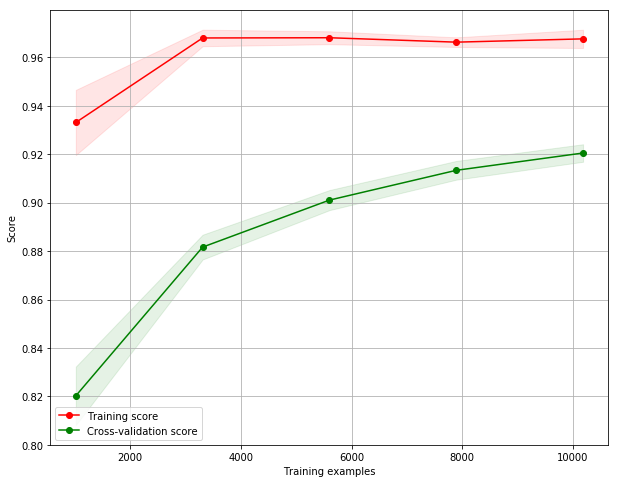

In [456]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann, ann_title, x_train, y_train.values.reshape(-1), cv=ann_cv, n_jobs=4, figsize=(10,8))

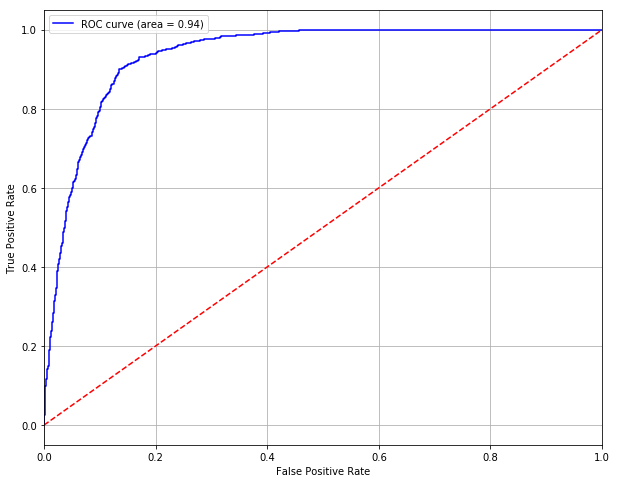

In [465]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [466]:
ann_pred = ann.predict(x_test)

In [467]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[5244,  238],
       [ 308,  389]], dtype=int64)

In [468]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.9116361870852889

In [469]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.620414673046252

In [470]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.5581061692969871

In [471]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.5876132930513596

## ICA

In [130]:
ica = FastICA()

In [131]:
ica.fit(x)

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=None, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [132]:
x_transformed = ica.fit_transform(x)

Text(0, 0.5, 'Delta Kurtosis (from Gaussian)')

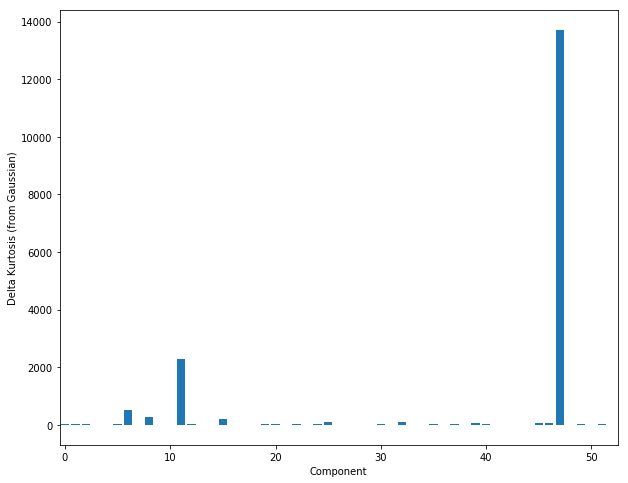

In [134]:
plt.figure(figsize=(10, 8))
plt.bar(range(x_transformed.shape[1]), (kurtosis(x_transformed, axis=0) - 3))
plt.xlim(-0.5, x_transformed.shape[1]-0.5)
plt.xlabel('Component')
plt.ylabel('Delta Kurtosis (from Gaussian)')

In [136]:
kurtosis(x_transformed, axis=0) - 3

array([ 1.81229569e+01,  3.05541538e+01,  2.42490722e+01,  6.34982138e-01,
        2.33484007e+00,  1.92502861e+01,  5.06190671e+02,  2.01194344e+00,
        2.81063374e+02,  1.99524761e+00,  1.69885775e+00,  2.27952224e+03,
        1.54012092e+01,  1.09586672e+00,  7.24282712e+00,  2.17211615e+02,
       -2.55542968e-01, -2.55846356e+00,  1.98333729e+00,  3.66063248e+01,
        2.58058412e+01, -1.38786857e+00,  3.22339144e+01,  5.62486916e+00,
        2.06017033e+01,  1.17063161e+02,  6.66449515e-01, -4.94042584e+00,
        9.77174712e+00, -4.71012902e+00,  3.48359206e+01, -1.25132572e+00,
        1.16364736e+02, -9.48493604e-01, -2.62814977e+00,  3.35726839e+01,
       -4.74838132e+00,  1.55172693e+01, -2.53860155e+00,  4.89215315e+01,
        1.99451997e+01, -9.57385509e-01, -4.66752527e+00, -4.69752658e+00,
       -3.18454828e+00,  6.67445149e+01,  6.32393145e+01,  1.37201821e+04,
        5.72469474e+00,  3.80454267e+01, -4.28998664e+00,  2.19945441e+01,
       -4.23830269e+00])

In [147]:
ica_red = FastICA(n_components=5, max_iter=5000)

In [148]:
x_red_ica = ica_red.fit_transform(x)

Text(0, 0.5, 'Delta Kurtosis (from Gaussian)')

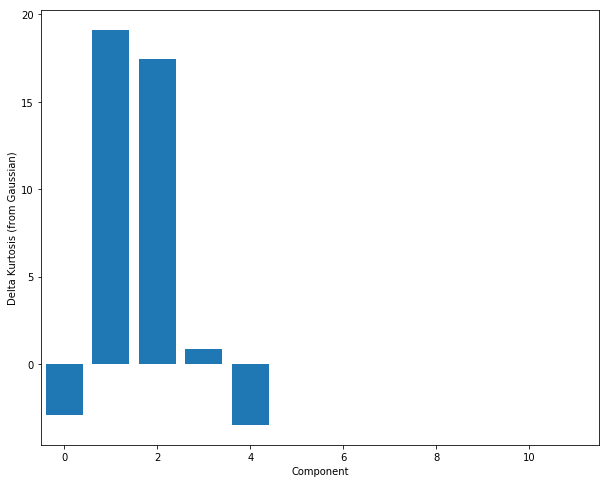

In [149]:
plt.figure(figsize=(10, 8))
plt.bar(range(5), (kurtosis(x_red_ica, axis=0) - 3))
plt.xlim(-0.5, 11.5)
plt.xlabel('Component')
plt.ylabel('Delta Kurtosis (from Gaussian)')

In [150]:
x_recon_ica = ica_red.inverse_transform(x_red_ica)

In [151]:
np.sum(np.sqrt(np.mean(np.square(x.values - x_recon_ica), axis=0)))

16.27818859541174

In [239]:
np.mean(np.abs(x.values - x_recon_ica) / x.values, axis=0) * 100

array([0.01725736, 0.00406055, 0.03958809, 0.01188641, 0.04730539,
       0.01108944, 0.02073569, 0.04003685, 0.06898931, 0.03559148,
       0.01532594, 0.08202916, 0.00730034, 0.02283887])

## K-Means on ICA

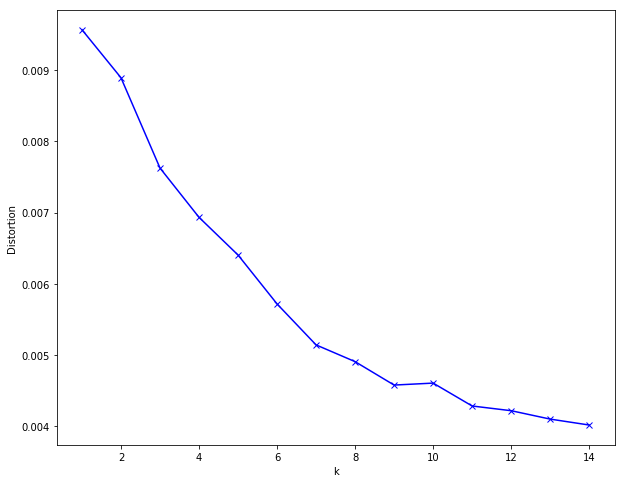

In [433]:
elbow_method(x_red_ica, range(1, 15))

In [435]:
k = 9
km_ica_clusters = KMeans(k).fit_predict(x_red_ica)
show_class_splits(km_ica_clusters, y)

[8435] [100]
[8117] [145]
[547] [966]
[8616] [174]
[5366] [707]
[1332] [1198]
[615] [374]
[2325] [330]
[1195] [646]


## EM on ICA

<Figure size 720x576 with 0 Axes>

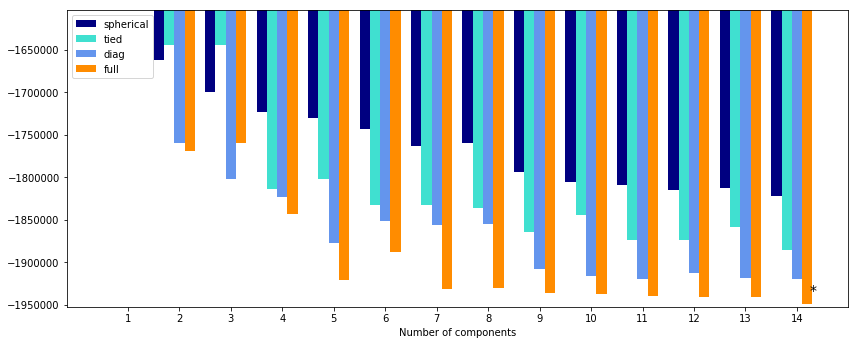

In [436]:
n = 15
plt.figure(figsize=(10, 8))
bic = BIC_scores(x_red_ica, range(1, n))

Text(0, 0.5, 'BIC')

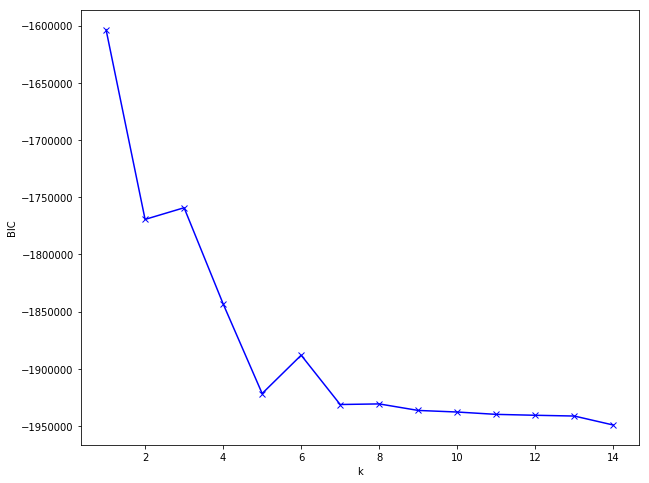

In [437]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, n), bic.reshape(-1, n-1)[-1, :], 'bx-')
plt.xlabel('k')
plt.ylabel('BIC')

In [438]:
k = 5
gmm = GaussianMixture(k, 'full')
gmm.fit(x_red_ica)
em_ica_clusters = gmm.fit_predict(x_red_ica)
show_class_splits(em_ica_clusters, y)

[23365] [117]
[2958] [1223]
[548] [967]
[7285] [987]
[2392] [1346]


## Randomized Projection

In [295]:
gauss_random = GaussianRandomProjection(n_components=20, eps=0.1)

In [296]:
x_red_ran = gauss_random.fit_transform(x)

In [297]:
x_recon_ran = np.matmul(x_red_ran, gauss_random.components_)

In [298]:
np.sum(np.sqrt(np.mean(np.square(x.values - x_recon_ran), axis=0)))

40823.02142033875

In [156]:
np.mean(np.abs(x.values - x_recon_ran) / x.values, axis=0) * 100

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 2.42595665e+03,             inf,  3.50995361e+04,             inf,
                   inf, -2.24817964e+05,  5.23432134e+02, -2.86519473e+03,
        1.70160194e+05,  1.19812272e+01,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf])

In [411]:
sparse_random = SparseRandomProjection(n_components=20, eps=0.1)

In [412]:
x_red_sprs = sparse_random.fit_transform(x)

In [413]:
x_recon_sprs = np.matmul(x_red_sprs, sparse_random.components_.todense())

In [414]:
np.sum(np.sqrt(np.mean(np.square(x.values - x_recon_sprs), axis=0)))

15039.822221891025

In [226]:
np.mean(np.abs(x.values - x_recon_sprs) / x.values, axis=0) * 100

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


matrix([[ 1.00000000e+02,             inf,  1.91787656e+05,
                     inf,             inf, -1.64919595e+03,
          3.79174938e+03, -3.54961436e+03,  1.34179744e+05,
          1.15964308e+02,             nan,             inf,
                     inf,             nan,             inf,
                     inf,             inf,             inf,
                     inf,             nan,             inf,
                     inf,             nan,             inf,
                     inf,             inf,             inf,
                     inf,             inf,             inf,
                     nan,             nan,             inf,
                     inf,             nan,             inf,
                     nan,             inf,             inf,
                     inf,             inf,             inf,
                     inf,             inf,             inf,
                     inf,             inf,             inf,
                     inf,             in

## t-SNE

In [5]:
tsne = TSNE()

In [6]:
x_tsne = tsne.fit_transform(x)

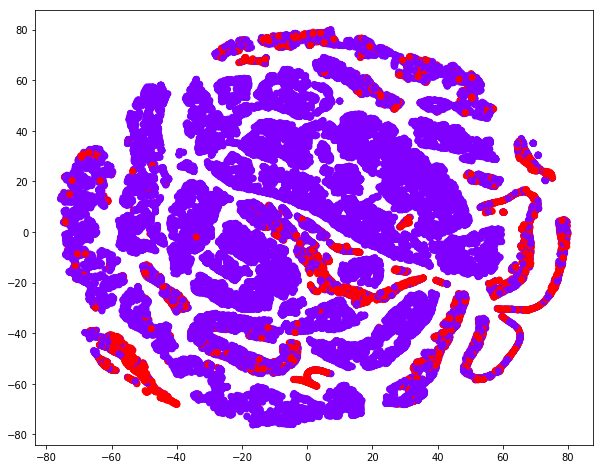

In [420]:
plt.figure(figsize=(10,8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y.values.reshape(-1,), cmap=plt.cm.rainbow)

In [426]:
x_tsne[:, 0]

array([-45.174282, -45.293972, -45.34933 , ...,  29.34516 ,  28.646187,
         6.449217], dtype=float32)

## NN on t-SNE

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.15, shuffle=True, random_state=24)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
ann = MLPClassifier((64, 64), activation='logistic', solver='adam')

In [10]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[learning_curve] Training set sizes: [ 1018  3309  5600  7891 10183]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.2min finished


<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

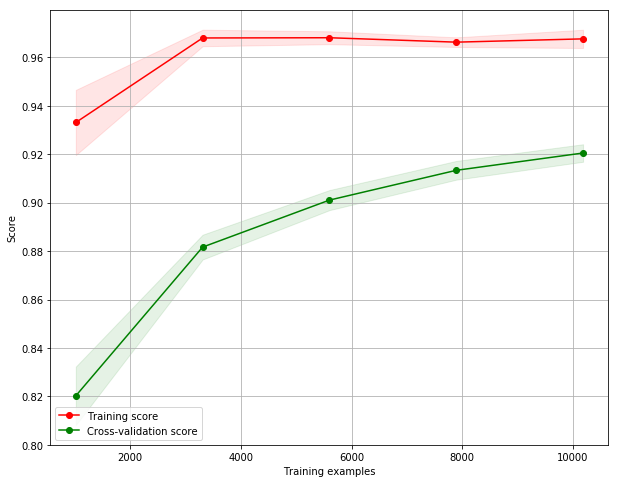

In [456]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann, ann_title, x_train, y_train.values.reshape(-1), cv=ann_cv, n_jobs=4, figsize=(10,8))

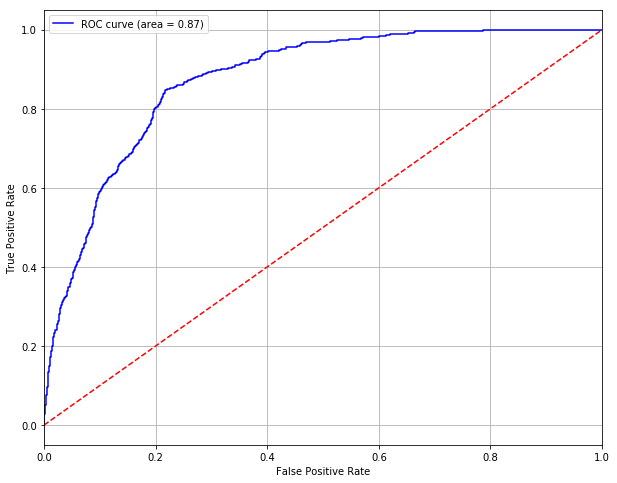

In [11]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [12]:
ann_pred = ann.predict(x_test)

In [13]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[5407,   75],
       [ 563,  134]], dtype=int64)

In [14]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.8967470464476452

In [15]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.6411483253588517

In [16]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.19225251076040173

In [17]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.2958057395143488